### AC1: Rips, Cech, Alpha
##### David Armendáriz | A01570813

In [2]:
# Importar Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import gudhi
from scipy.spatial.distance import squareform, pdist

In [3]:
a = [1,7,4,9,0,2,9]
b = [1,0,6,6,14,19,17]

point = ['P1','P2','P3','P4','P5','P6','P7']
data = pd.DataFrame({'Point':point, 'a':np.round(a,2), 'b':np.round(b,2)})
data = data.set_index('Point')
print(data)

       a   b
Point       
P1     1   1
P2     7   0
P3     4   6
P4     9   6
P5     0  14
P6     2  19
P7     9  17


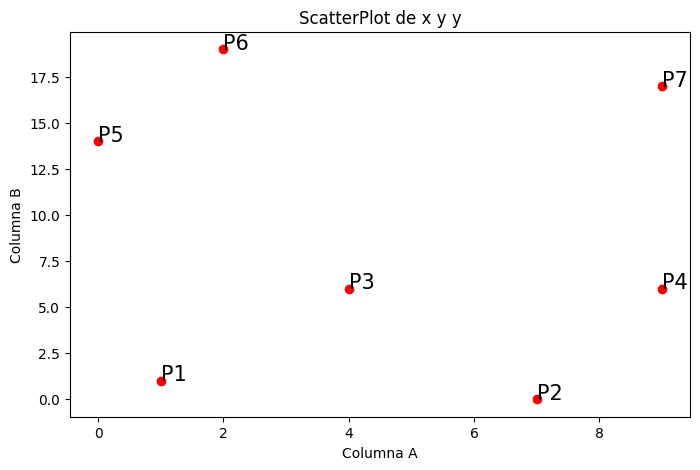

In [4]:
#Graficar
plt.figure(figsize=(8,5))
plt.scatter(data['a'], data['b'], c='r', marker='o')
plt.xlabel('Columna A')
plt.ylabel('Columna B')
plt.title('ScatterPlot de x y y')

for j in data.itertuples():
    plt.annotate(j.Index, (j.a, j.b), fontsize=15)

In [5]:
#Matriz de Distancias Euclidianas
dist = pd.DataFrame(squareform(pdist(data[["a", "b"]]), "euclidean"), columns=data.index.values, index=data.index.values)
dist

,P1,P2,P3,P4,P5,P6,P7
P1,0.000000,6.082763,5.830952,9.433981,13.038405,18.027756,17.888544
P2,6.082763,0.000000,6.708204,6.324555,15.652476,19.646883,17.117243
P3,5.830952,6.708204,0.000000,5.000000,8.944272,13.152946,12.083046
P4,9.433981,6.324555,5.000000,0.000000,12.041595,14.764823,11.000000
P5,13.038405,15.652476,8.944272,12.041595,0.000000,5.385165,9.486833
P6,18.027756,19.646883,13.152946,14.764823,5.385165,0.000000,7.280110
P7,17.888544,17.117243,12.083046,11.000000,9.486833,7.280110,0.000000


In [6]:
#Filtración de Rips con un raadio de 20
rips_complex = gudhi.RipsComplex(points=[[1,1], [7,0], [4,6], [9,6], [0,14], [2,19], [9,17]],max_edge_length=20.0)

In [7]:
#Arbol de complejos simpliciales e imprimmos la información
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
        repr(simplex_tree.num_vertices()) + 'vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Rips complex is of dimension 2 - 63 simplices - 7vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[2, 3] -> 5.00
[4, 5] -> 5.39
[0, 2] -> 5.83
[0, 1] -> 6.08
[1, 3] -> 6.32
[1, 2] -> 6.71
[0, 1, 2] -> 6.71
[1, 2, 3] -> 6.71
[5, 6] -> 7.28
[2, 4] -> 8.94
[0, 3] -> 9.43
[0, 1, 3] -> 9.43
[0, 2, 3] -> 9.43
[4, 6] -> 9.49
[4, 5, 6] -> 9.49
[3, 6] -> 11.00
[3, 4] -> 12.04
[2, 3, 4] -> 12.04
[3, 4, 6] -> 12.04
[2, 6] -> 12.08
[2, 3, 6] -> 12.08
[2, 4, 6] -> 12.08
[0, 4] -> 13.04
[0, 2, 4] -> 13.04
[0, 3, 4] -> 13.04
[2, 5] -> 13.15
[2, 4, 5] -> 13.15
[2, 5, 6] -> 13.15
[3, 5] -> 14.76
[2, 3, 5] -> 14.76
[3, 4, 5] -> 14.76
[3, 5, 6] -> 14.76
[1, 4] -> 15.65
[0, 1, 4] -> 15.65
[1, 2, 4] -> 15.65
[1, 3, 4] -> 15.65
[1, 6] -> 17.12
[1, 2, 6] -> 17.12
[1, 3, 6] -> 17.12
[1, 4, 6] -> 17.12
[0, 6] -> 17.89
[0, 1, 6] -> 17.89
[0, 2, 6] -> 17.89
[0, 3, 6] -> 17.89
[0, 4, 6] -> 17.89
[0, 5] -> 18.03
[0, 2, 5] -> 18.03
[0, 3, 5] -> 18.03
[0, 4, 5] -> 18.03
[

In [8]:
#Graficar complejo de rips
def plot_rips_complex(data, R, label="data", col=1, maxdim=2):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data[:, 0], data[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data)))
    )

    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data):
        if maxdim >=1:
            for j in range(i + 1, len(data)):
                pq = data[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data)):
                        ab = data[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass

C:\Users\david\AppData\Local\Temp\ipykernel_9228\2913073357.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


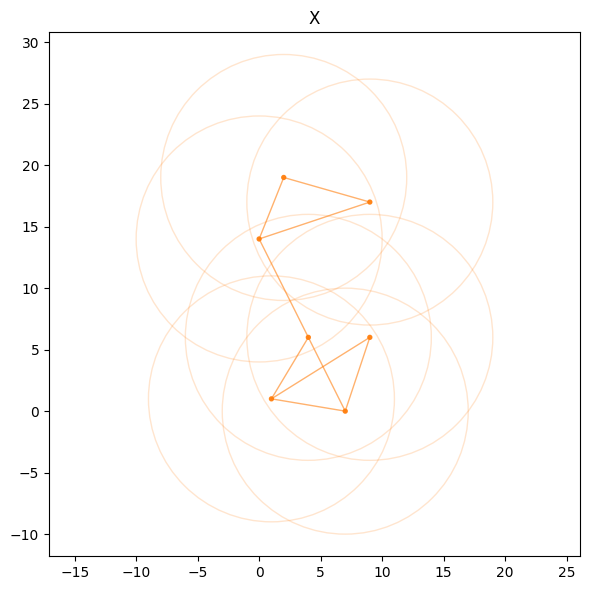

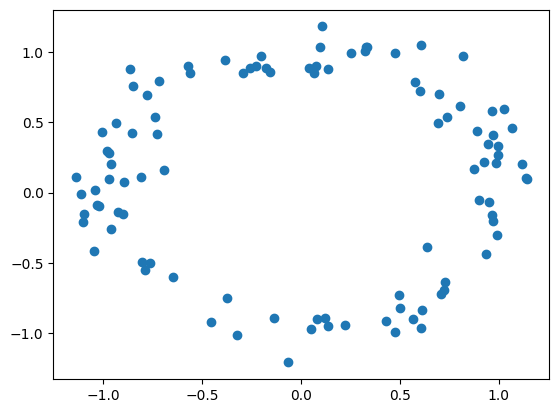

In [9]:
X = np.array([[1, 1], [7,0], [4,6], [9,6], [0,14], [2,19], [9,17]])
plot_rips_complex(X, R=10, label="X", maxdim=1)

import tadasets

np.random.seed(565656)
data_noisy = tadasets.dsphere(d=1, n=100, noise=0.10)
plt.scatter(data_noisy[:,0], data_noisy[:,1])
plt.show()

#### Dataset 1

C:\Users\david\AppData\Local\Temp\ipykernel_9228\2913073357.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


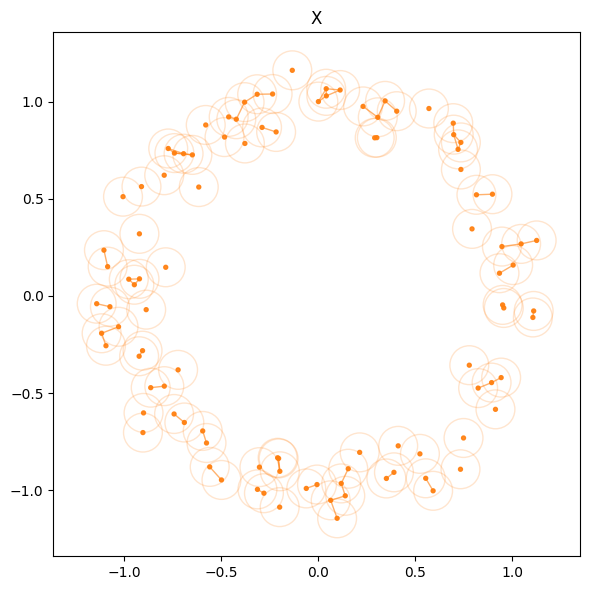

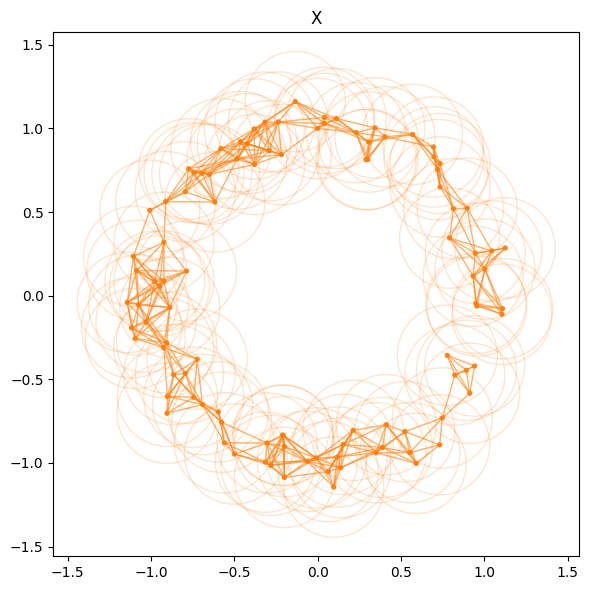

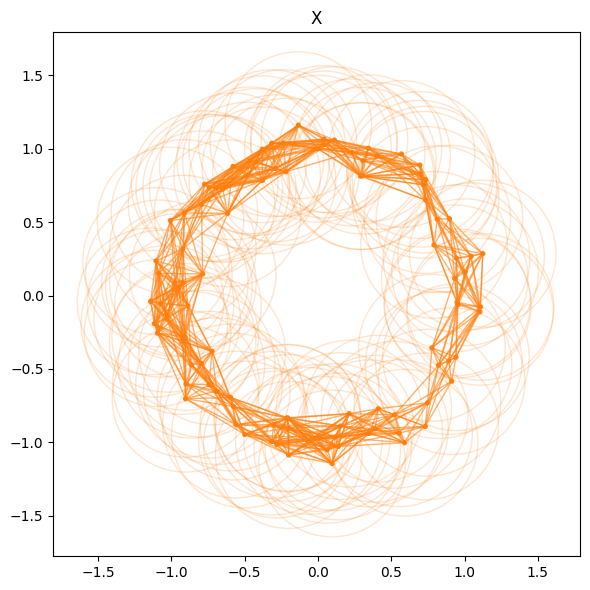

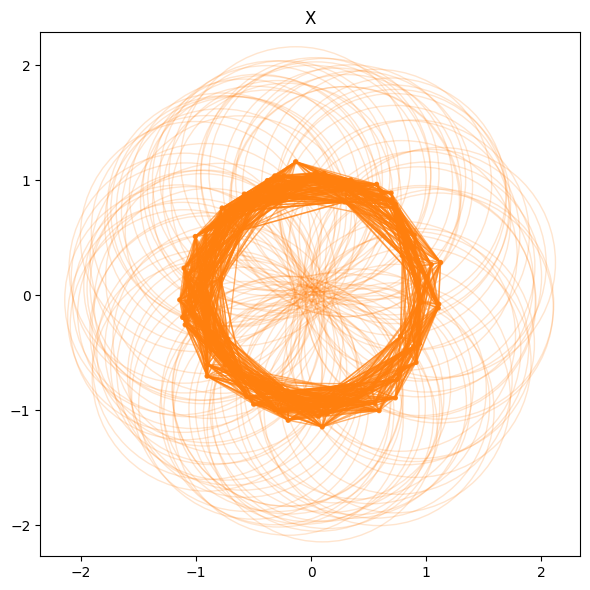

In [10]:
# Complejos de Rips | Parece denotar un ciruclo
data1 = np.genfromtxt('Activity1.csv', delimiter=',')
plot_rips_complex(data1, R=0.1, label="X", maxdim=1)
plot_rips_complex(data1, R=0.3, label="X", maxdim=1)
plot_rips_complex(data1, R=0.5, label="X", maxdim=1)
plot_rips_complex(data1, R=1, label="X", maxdim=1)

In [11]:
# Complejo de Alpha
alpha1 = gudhi.AlphaComplex(points = data1)

simplex_tree = alpha1.create_simplex_tree()
result_str = 'Alpha complex is of dimension ' + repr(simplex_tree.dimension()) + ' | ' + repr(simplex_tree.num_simplices()) + ' simplices | ' + repr(simplex_tree.num_vertices()) + ' vertices'
print(result_str)
fmt = '%s -> %f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex is of dimension 2 | 563 simplices | 101 vertices
[0] -> 0.000000
[1] -> 0.000000
[2] -> 0.000000
[3] -> 0.000000
[4] -> 0.000000
[5] -> 0.000000
[6] -> 0.000000
[7] -> 0.000000
[8] -> 0.000000
[9] -> 0.000000
[10] -> 0.000000
[11] -> 0.000000
[12] -> 0.000000
[13] -> 0.000000
[14] -> 0.000000
[15] -> 0.000000
[16] -> 0.000000
[17] -> 0.000000
[18] -> 0.000000
[19] -> 0.000000
[20] -> 0.000000
[21] -> 0.000000
[22] -> 0.000000
[23] -> 0.000000
[24] -> 0.000000
[25] -> 0.000000
[26] -> 0.000000
[27] -> 0.000000
[28] -> 0.000000
[29] -> 0.000000
[30] -> 0.000000
[31] -> 0.000000
[32] -> 0.000000
[33] -> 0.000000
[34] -> 0.000000
[35] -> 0.000000
[36] -> 0.000000
[37] -> 0.000000
[38] -> 0.000000
[39] -> 0.000000
[40] -> 0.000000
[41] -> 0.000000
[42] -> 0.000000
[43] -> 0.000000
[44] -> 0.000000
[45] -> 0.000000
[46] -> 0.000000
[47] -> 0.000000
[48] -> 0.000000
[49] -> 0.000000
[50] -> 0.000000
[51] -> 0.000000
[52] -> 0.000000
[53] -> 0.000000
[54] -> 0.000000
[55] -> 0.00

### Dataset 2

C:\Users\david\AppData\Local\Temp\ipykernel_9228\2913073357.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


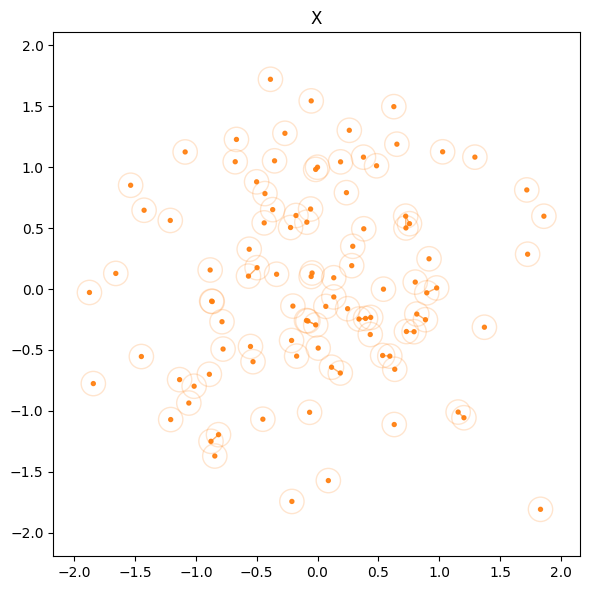

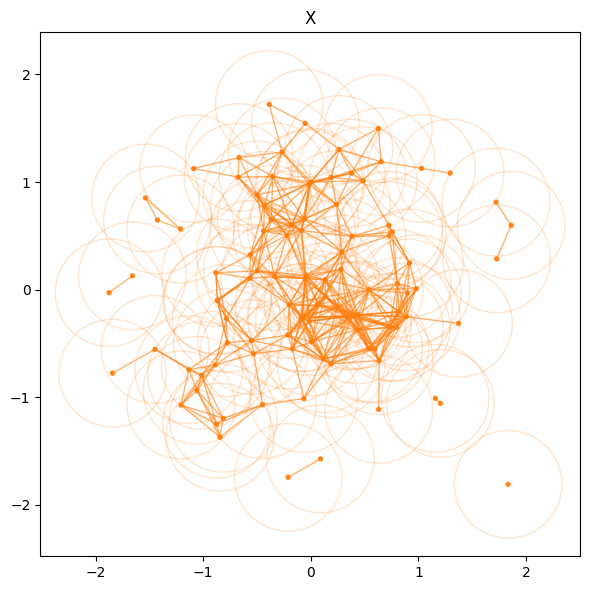

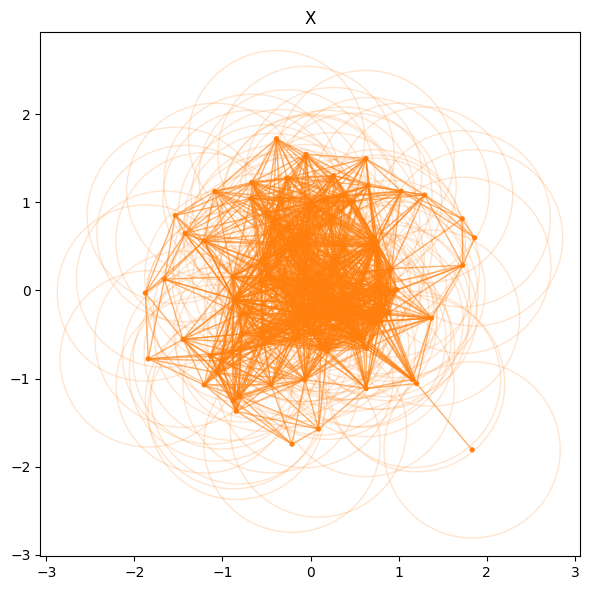

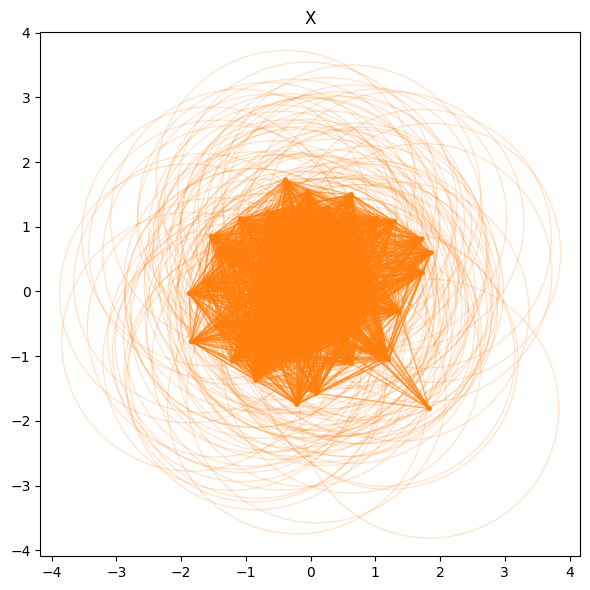

In [17]:
# Complejo de Rips | Parece denotar una forma no definida
data2 = np.genfromtxt('Activity2.csv', delimiter=',')
plot_rips_complex(data2, R=0.1, label="X", maxdim=1)
plot_rips_complex(data2, R=0.5, label="X", maxdim=1)
plot_rips_complex(data2, R=1, label="X", maxdim=1)
plot_rips_complex(data2, R=2, label="X", maxdim=1)

In [13]:
#Complejo de alpha
alpha2 = gudhi.AlphaComplex(points = data2)

simplex_tree = alpha2.create_simplex_tree()
result_str = 'Alpha complex is of dimension ' + repr(simplex_tree.dimension()) + ' | ' + repr(simplex_tree.num_simplices()) + ' simplices | ' + repr(simplex_tree.num_vertices()) + ' vertices'
print(result_str)
fmt = '%s -> %f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex is of dimension 2 | 579 simplices | 101 vertices
[0] -> 0.000000
[1] -> 0.000000
[2] -> 0.000000
[3] -> 0.000000
[4] -> 0.000000
[5] -> 0.000000
[6] -> 0.000000
[7] -> 0.000000
[8] -> 0.000000
[9] -> 0.000000
[10] -> 0.000000
[11] -> 0.000000
[12] -> 0.000000
[13] -> 0.000000
[14] -> 0.000000
[15] -> 0.000000
[16] -> 0.000000
[17] -> 0.000000
[18] -> 0.000000
[19] -> 0.000000
[20] -> 0.000000
[21] -> 0.000000
[22] -> 0.000000
[23] -> 0.000000
[24] -> 0.000000
[25] -> 0.000000
[26] -> 0.000000
[27] -> 0.000000
[28] -> 0.000000
[29] -> 0.000000
[30] -> 0.000000
[31] -> 0.000000
[32] -> 0.000000
[33] -> 0.000000
[34] -> 0.000000
[35] -> 0.000000
[36] -> 0.000000
[37] -> 0.000000
[38] -> 0.000000
[39] -> 0.000000
[40] -> 0.000000
[41] -> 0.000000
[42] -> 0.000000
[43] -> 0.000000
[44] -> 0.000000
[45] -> 0.000000
[46] -> 0.000000
[47] -> 0.000000
[48] -> 0.000000
[49] -> 0.000000
[50] -> 0.000000
[51] -> 0.000000
[52] -> 0.000000
[53] -> 0.000000
[54] -> 0.000000
[55] -> 0.00

### Dataset 3

C:\Users\david\AppData\Local\Temp\ipykernel_9228\2913073357.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


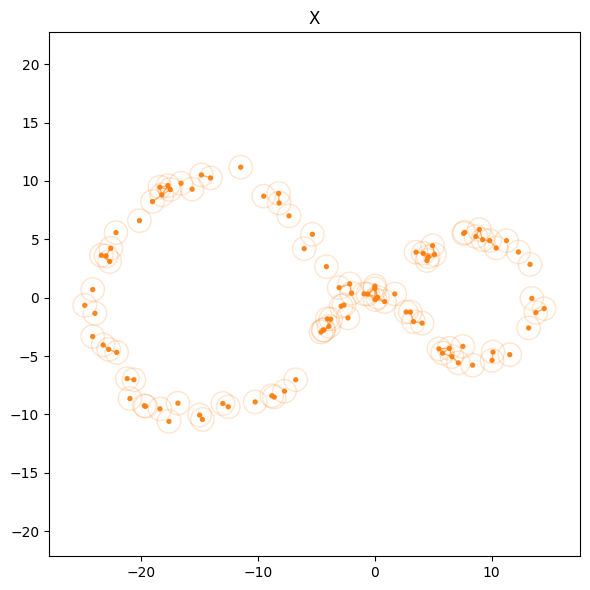

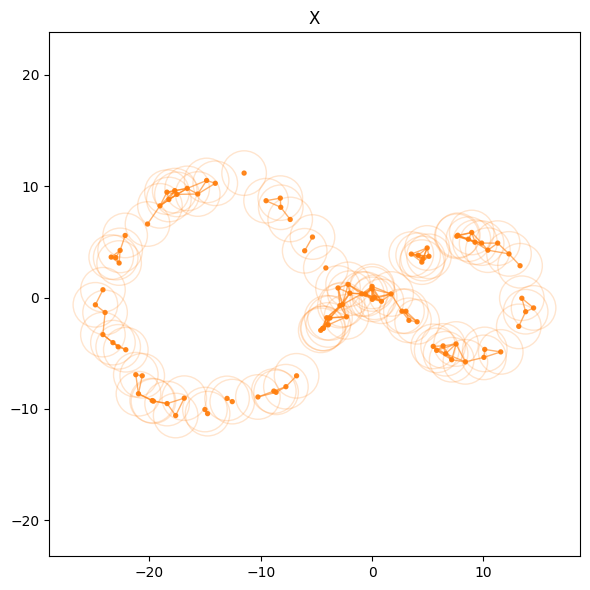

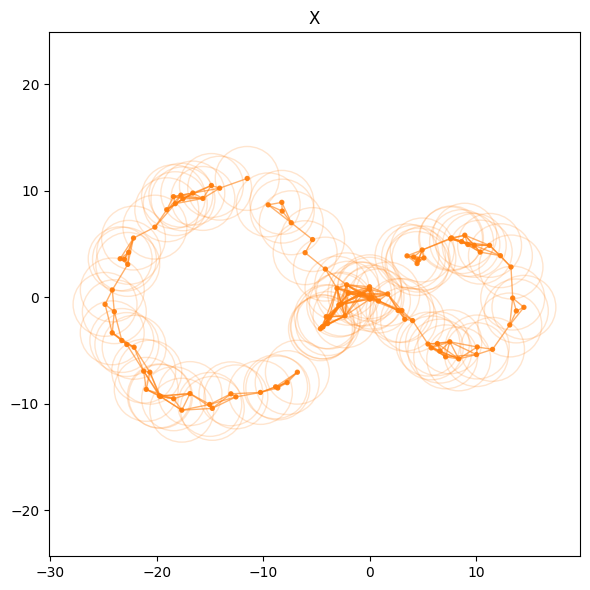

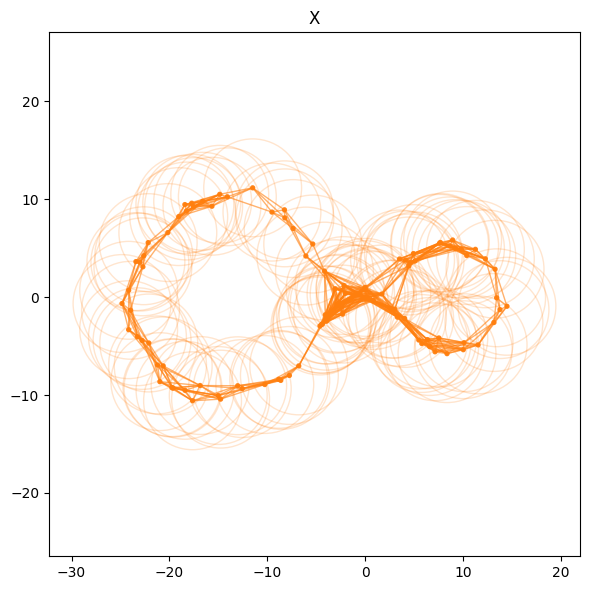

In [14]:
# Complejo de Rips | Parece denotar dos circulos conectados
data3 = np.genfromtxt('Activity3.csv', delimiter=',')
plot_rips_complex(data3, R=1, label="X", maxdim=1)
plot_rips_complex(data3, R=2, label="X", maxdim=1)
plot_rips_complex(data3, R=3, label="X", maxdim=1)
plot_rips_complex(data3, R=5, label="X", maxdim=1)

In [15]:
#Complejo de alpha
alpha3 = gudhi.AlphaComplex(points = data3)

simplex_tree = alpha3.create_simplex_tree()
result_str = 'Alpha complex is of dimension ' + repr(simplex_tree.dimension()) + ' | ' + repr(simplex_tree.num_simplices()) + ' simplices | ' + repr(simplex_tree.num_vertices()) + ' vertices'
print(result_str)
fmt = '%s -> %f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex is of dimension 2 | 565 simplices | 101 vertices
[0] -> 0.000000
[1] -> 0.000000
[2] -> 0.000000
[3] -> 0.000000
[4] -> 0.000000
[5] -> 0.000000
[6] -> 0.000000
[7] -> 0.000000
[8] -> 0.000000
[9] -> 0.000000
[10] -> 0.000000
[11] -> 0.000000
[12] -> 0.000000
[13] -> 0.000000
[14] -> 0.000000
[15] -> 0.000000
[16] -> 0.000000
[17] -> 0.000000
[18] -> 0.000000
[19] -> 0.000000
[20] -> 0.000000
[21] -> 0.000000
[22] -> 0.000000
[23] -> 0.000000
[24] -> 0.000000
[25] -> 0.000000
[26] -> 0.000000
[27] -> 0.000000
[28] -> 0.000000
[29] -> 0.000000
[30] -> 0.000000
[31] -> 0.000000
[32] -> 0.000000
[33] -> 0.000000
[34] -> 0.000000
[35] -> 0.000000
[36] -> 0.000000
[37] -> 0.000000
[38] -> 0.000000
[39] -> 0.000000
[40] -> 0.000000
[41] -> 0.000000
[42] -> 0.000000
[43] -> 0.000000
[44] -> 0.000000
[45] -> 0.000000
[46] -> 0.000000
[47] -> 0.000000
[48] -> 0.000000
[49] -> 0.000000
[50] -> 0.000000
[51] -> 0.000000
[52] -> 0.000000
[53] -> 0.000000
[54] -> 0.000000
[55] -> 0.00